# Tutorial for wind process module

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pyshipsim
from utils import font_setting

font_setting()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
ImportError: Import of esso_osaka_3m's f2py mpdule failed.
ImportError: Import of esso_osaka_3m's f2py mpdule failed.
ImportError: Import of takaoki_3m's f2py mpdule failed.


### Instantiate wind process module

In [2]:
wind = pyshipsim.WindProcess()
print(f"Implemented modes are {wind.implemented_mode}")
print(f"'{wind.mode}' is selected by default.")

# you can select the mode as follows
wind = pyshipsim.WindProcess(mode="random")

Implemented modes are ['stationary', 'random', 'random_EM', 'random_MAKI']
'random' is selected by default.


Mode description:
- The 'stationary' mode generate stationary wind.
- The 'random' mode generate random winds by numerically solving a 1D filter using Euler-Maruyama's method.
- The 'random_EM' mode is same as 'random'.
- The 'random_MAKI' mode generate random winds by numerically solving a 1D filter using maki's practical method.

References:
- Maki, A., Maruyama, Y., Dostal, L. et al. Practical method for evaluating wind influence on autonomous ship operations. J Mar Sci Technol 27, 1302-1313 (2022). https://doi.org/10.1007/s00773-022-00901-w


# How to simulate

### Random mode (U = 10.0 m/s)

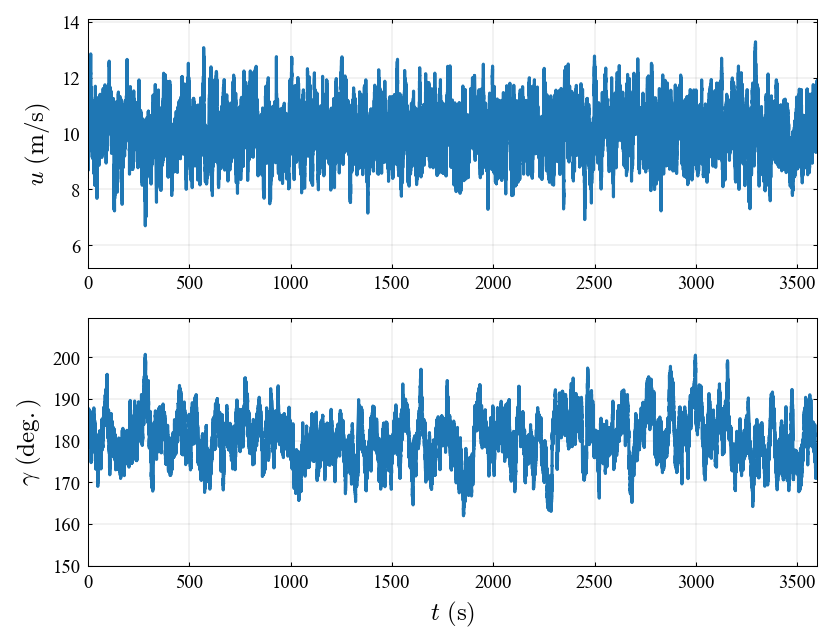

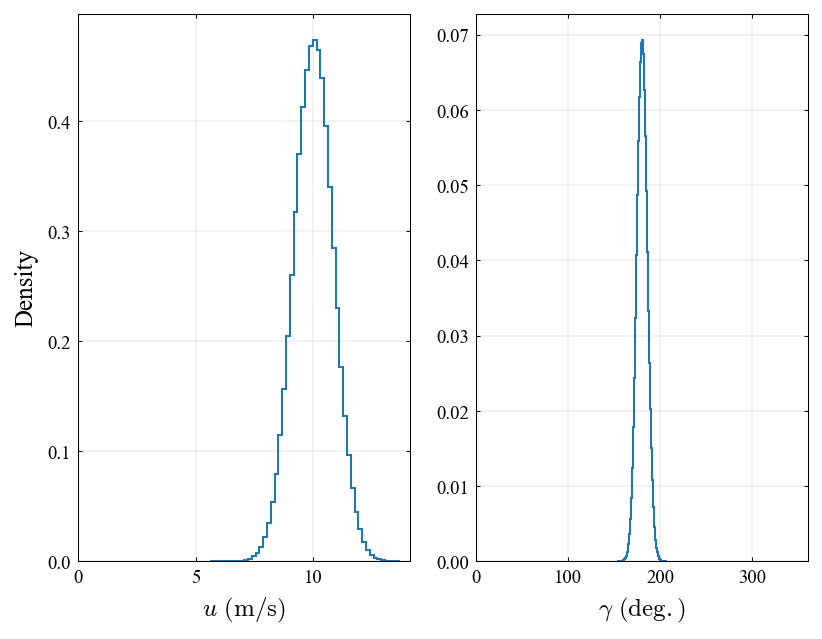

In [3]:
wind = pyshipsim.WindProcess(mode="random")
T = 60*60*24 # (s)
dt = 0.01  # (s)
u_0 = 10.0 # (m/s)
gamma_0 = np.pi # (rad.)

# simulate
w0 = wind.reset([u_0, gamma_0])
t_log = [wind.get_time()]
w_log = [w0]
while wind.get_time() <= T:
    t = wind.get_time()
    w = wind.step(dt)
    t_log.append(t)
    w_log.append(w)
t_log = np.array(t_log)
w_log = np.array(w_log)

# plot
fig, axes = plt.subplots(2, 1)
axes[0].plot(t_log, w_log[:, 0])
axes[0].set_ylabel("$u \ \mathrm{(m/s)}$")
axes[1].plot(t_log, np.rad2deg(w_log[:, 1])%(360))
axes[1].set_ylabel("$\\gamma \ \mathrm{(deg.)}$")
axes[1].set_xlabel("$t \ \mathrm{(s)}$")
axes[0].set_xlim(0, 60*60)
axes[1].set_xlim(0, 60*60)
plt.show()

fig, axes = plt.subplots(1, 2)
kwargs = {"bins":50, "histtype":"step", "density":True}
axes[0].hist(w_log[:, 0], **kwargs)
axes[1].hist(np.rad2deg(w_log[:, 1])%(360), **kwargs)
axes[0].set_xlabel("$u \ \mathrm{(m/s)}$")
axes[1].set_xlabel("$\\gamma \ \mathrm{(deg.)}$")
axes[0].set_ylabel("Density")
axes[0].set_xlim(left=0)
axes[1].set_xlim(0, 360)
plt.show()

### Random mode (U = 0.1 m/s)

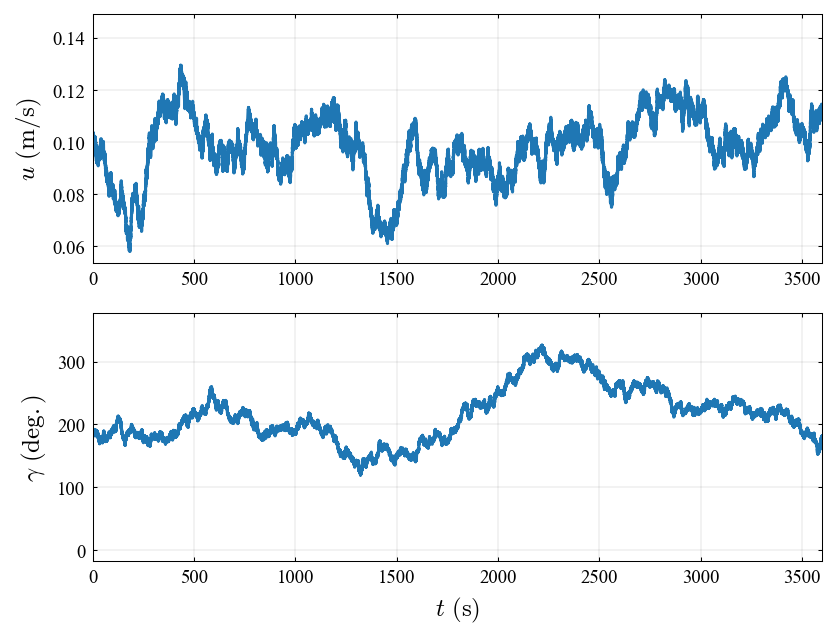

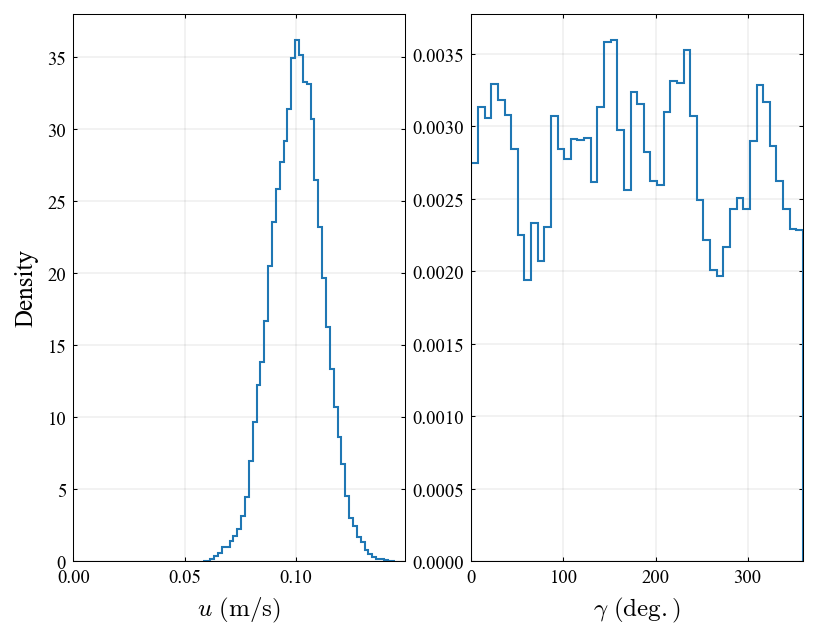

In [4]:
wind = pyshipsim.WindProcess(mode="random")
T = 60*60*24 # (s)
dt = 0.01  # (s)
u_0 = 0.1 # (m/s)
gamma_0 = np.pi # (rad.)

# simulate
w0 = wind.reset([u_0, gamma_0])
t_log = [wind.get_time()]
w_log = [w0]
while wind.get_time() <= T:
    t = wind.get_time()
    w = wind.step(dt)
    t_log.append(t)
    w_log.append(w)
t_log = np.array(t_log)
w_log = np.array(w_log)

# plot
fig, axes = plt.subplots(2, 1)
axes[0].plot(t_log, w_log[:, 0])
axes[0].set_ylabel("$u \ \mathrm{(m/s)}$")
axes[1].plot(t_log, np.rad2deg(w_log[:, 1])%(360))
axes[1].set_ylabel("$\\gamma \ \mathrm{(deg.)}$")
axes[1].set_xlabel("$t \ \mathrm{(s)}$")
axes[0].set_xlim(0, 60*60)
axes[1].set_xlim(0, 60*60)
plt.show()

fig, axes = plt.subplots(1, 2)
kwargs = {"bins":50, "histtype":"step", "density":True}
axes[0].hist(w_log[:, 0], **kwargs)
axes[1].hist(np.rad2deg(w_log[:, 1])%(360), **kwargs)
axes[0].set_xlabel("$u \ \mathrm{(m/s)}$")
axes[1].set_xlabel("$\\gamma \ \mathrm{(deg.)}$")
axes[0].set_ylabel("Density")
axes[0].set_xlim(left=0)
axes[1].set_xlim(0, 360)
plt.show()

### Stationary mode

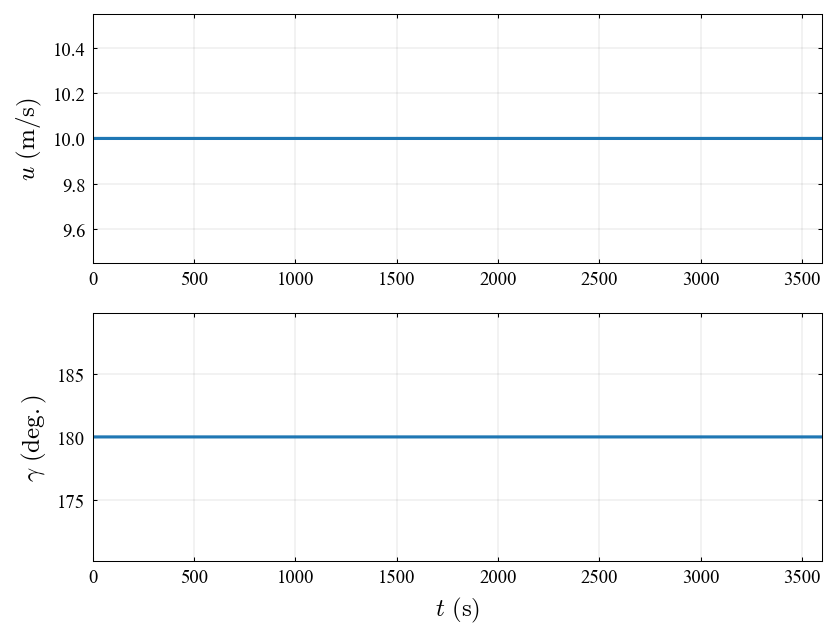

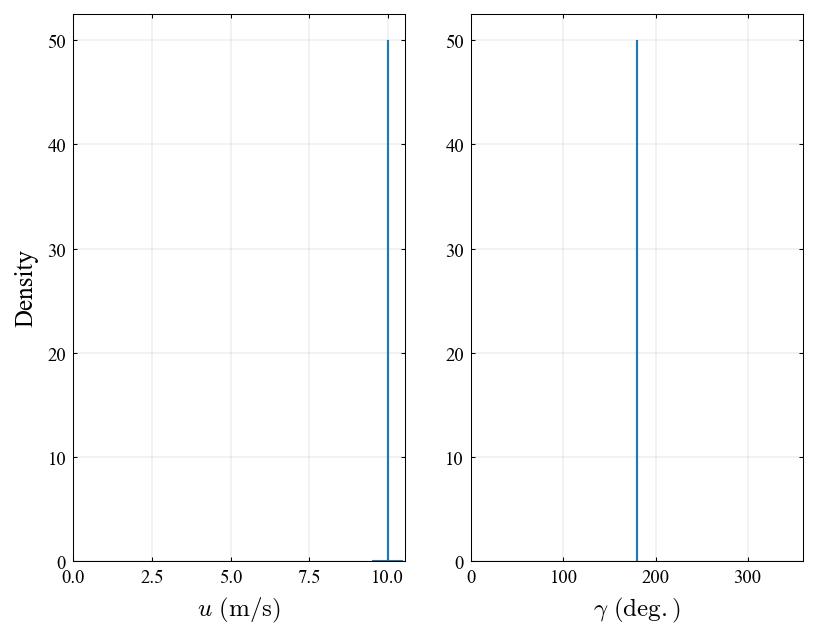

In [5]:
wind = pyshipsim.WindProcess(mode="stationary")
T = 60*60*24 # (s)
dt = 0.01  # (s)
u_0 = 10.0 # (m/s)
gamma_0 = np.pi # (rad.)

# simulate
w0 = wind.reset([u_0, gamma_0])
t_log = [wind.get_time()]
w_log = [w0]
while wind.get_time() <= T:
    t = wind.get_time()
    w = wind.step(dt)
    t_log.append(t)
    w_log.append(w)
t_log = np.array(t_log)
w_log = np.array(w_log)

fig, axes = plt.subplots(2, 1)
axes[0].plot(t_log, w_log[:, 0])
axes[0].set_ylabel("$u \ \mathrm{(m/s)}$")
axes[1].plot(t_log, np.rad2deg(w_log[:, 1]))
axes[1].set_ylabel("$\\gamma \ \mathrm{(deg.)}$")
axes[1].set_xlabel("$t \ \mathrm{(s)}$")
axes[0].set_xlim(0, 60*60)
axes[1].set_xlim(0, 60*60)
plt.show()

fig, axes = plt.subplots(1, 2)
kwargs = {"bins":50, "histtype":"step", "density":True}
axes[0].hist(w_log[:, 0], **kwargs)
axes[1].hist(np.rad2deg(w_log[:, 1]), **kwargs)
axes[0].set_xlabel("$u \ \mathrm{(m/s)}$")
axes[1].set_xlabel("$\\gamma \ \mathrm{(deg.)}$")
axes[0].set_ylabel("Density")
axes[0].set_xlim(left=0)
axes[1].set_xlim(0, 360)
plt.show()